## Load libraries

In [ ]:
from pandas_plink import read_plink1_bin
import pandas as pd
import transprs as tprs

## Read input

In [ ]:
# Read the population file
population = read_plink1_bin("./data/EUR.bed",
                             "./data/EUR.bim",
                             "./data/EUR.fam")
# Read sumstats file
sumstats = pd.read_table("./data/Height.gwas.txt.gz")

In [3]:
# Create the DataProcessor object
processor = tprs.datasets.DataProcessor(sumstats=sumstats, population=population)

In [4]:
phenotype = pd.read_table("./data/EUR.height")

In [5]:
processor.add_phenotype(phenotype)

Phenotype stored in .phenotype


/scratch/user/uqdpham4/.conda/envs/transprs/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


## Preprocessing

In [6]:
# Run preprocessing
processor.clean_snps()
processor.filter_imputed(info=0.9)
processor.extract_intersection()
processor.check_beta_se()
processor.flip_reverse()
processor.compute_pca(n_components=6)
processor.split_chromosomes()
processor.sort_snps_chr()
processor.cross_validation_split(id_col="FID",k_folds=5,n_repeats=10)

/scratch/user/uqdpham4/VGP/transprs/datasets/classes.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.sumstats["CHR"][


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
  --bfile tmp
  --indep-pairwise 200 50 0.25
  --out tmp

128656 MB RAM detected; reserving 64328 MB for main workspace.
551892 variants loaded from .bim file.
475 people (227 males, 248 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 475 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999896.
551892 variants and 475 people pass filters and QC.
Note: No phenotypes present.
Pruned 20659 variants from chromosome 1, leaving 21506.
Pruned 21363 variants from chromosome 2, leaving 21295.
Pruned 17875 var

## Run methods

In [8]:
# Run the method PRS method: clumping
tprs.methods.clumping(processor)

Extracting data...
Done extract data!
Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
  --bfile tmp
  --clump tmp_ss
  --clump-field P
  --clump-kb 250
  --clump-p1 1
  --clump-r2 0.5
  --clump-snp-field SNP
  --out tmp_out

128656 MB RAM detected; reserving 64328 MB for main workspace.
551892 variants loaded from .bim file.
475 people (227 males, 248 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 475 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

KeyboardInterrupt: 

In [9]:
# Run the method PRS method: double_weight
tprs.methods.double_weight(processor)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:00:34 ---


PRScs cần thêm LD reference. Cần chuẩn bị folder đó như trong hướng dẫn: https://github.com/getian107/PRScs

In [7]:
# Run the method PRS method: PRScs
tprs.methods.prscs(processor,ldref_dir="./data/ldblk_ukbb_eur/", use_col="OR",N=5000)

Extracting data...
Done extract data!
PRScs is running...
Applying PRScs for CHR 1...
PRScs for CHR 1 is done!
Applying PRScs for CHR 2...
PRScs for CHR 2 is done!
Applying PRScs for CHR 3...
PRScs for CHR 3 is done!
Applying PRScs for CHR 4...
PRScs for CHR 4 is done!
Applying PRScs for CHR 5...
PRScs for CHR 5 is done!
Applying PRScs for CHR 6...
PRScs for CHR 6 is done!
Applying PRScs for CHR 7...
PRScs for CHR 7 is done!
Applying PRScs for CHR 8...
PRScs for CHR 8 is done!
Applying PRScs for CHR 9...
PRScs for CHR 9 is done!
Applying PRScs for CHR 10...
PRScs for CHR 10 is done!
Applying PRScs for CHR 11...
PRScs for CHR 11 is done!
Applying PRScs for CHR 12...
PRScs for CHR 12 is done!
Applying PRScs for CHR 13...
PRScs for CHR 13 is done!
Applying PRScs for CHR 14...
PRScs for CHR 14 is done!
Applying PRScs for CHR 15...
PRScs for CHR 15 is done!
Applying PRScs for CHR 16...
PRScs for CHR 16 is done!
Applying PRScs for CHR 17...
PRScs for CHR 17 is done!
Applying PRScs for CHR 18

## Generate PRS for each method

In [15]:
tprs.scoring.generate_prs(processor,use_col="OR",method="clumping")

Extracting adjusted sumstats from clumping method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['clumping']!
--- Done in 0:00:12 ---


In [16]:
tprs.scoring.generate_prs(processor,use_col="OR",method="double_weight")

Extracting adjusted sumstats from double_weight method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['double_weight']!
--- Done in 0:00:18 ---


In [19]:
tprs.scoring.generate_prs(processor,use_col="OR",method="PRScs")

Extracting adjusted sumstats from PRScs method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['PRScs']!
--- Done in 0:00:09 ---


## Evaluation by r2_score metrics

In [ ]:
tprs.metrics.r2_score_evaluation(processor,method="clumping", trait_col="Height", prs_col="SCORE")

In [19]:
tprs.metrics.r2_score_evaluation(processor,method="double_weight", trait_col="Height", prs_col="SCORE")

The best fit p-value is 0.4
The best fit result is stored in processor.prs_results['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['r2_score']


In [21]:
tprs.metrics.r2_score_evaluation(processor,method="PRScs", trait_col="Height", prs_col="SCORE")

The best fit p-value is 0.4
The best fit result is stored in processor.prs_results['PRScs']['best_fit']
The best fit result is stored in processor.performance['PRScs']['r2_score']


## Combine methods based on the best fit p-value

In [22]:
# Run the method PRS method: clumping_double_weight
tprs.combine.combine_methods(processor,methods=["clumping","double_weight"], 
                             trait_col="Height",key_ss="clumping+double_weight",use_col="OR" )
tprs.scoring.generate_prs(processor,use_col="OR",method="clumping+double_weight")
tprs.metrics.r2_score_evaluation(processor,method="clumping+double_weight", trait_col="Height", prs_col="SCORE")

Estimating mixing weights...
Mixing weights are: [0.41598225 0.        ]
Estimating mixing is done!
Adjusted BETA...
Adjusted BETA is done
The clumping result stores in .adjusted_ss['clumping+double_weight']!
--- Done in 0:00:01 ---
Extracting adjusted sumstats from clumping+double_weight method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['clumping+double_weight']!
--- Done in 0:00:14 ---
The best fit p-value is 0.5
The best fit result is stored in processor.prs_results['clumping+double_weight']['best_fit']
The best fit result is stored in processor.performance['clumping+double_weight']['r2_score']


In [23]:
# Run the method PRS method: clumping_double_weight_PRScs
tprs.combine.combine_methods(processor,methods=["clumping","double_weight","PRScs"], 
                             trait_col="Height",key_ss="clumping+double_weight+PRScs",use_col="OR" )
tprs.scoring.generate_prs(processor,use_col="OR",method="clumping+double_weight+PRScs")
tprs.metrics.r2_score_evaluation(processor,method="clumping+double_weight+PRScs", trait_col="Height", prs_col="SCORE")

Estimating mixing weights...
Mixing weights are: [0.41598225 0.         0.        ]
Estimating mixing is done!
Adjusted BETA...
Adjusted BETA is done
The clumping result stores in .adjusted_ss['clumping+double_weight+PRScs']!
--- Done in 0:00:00 ---
Extracting adjusted sumstats from clumping+double_weight+PRScs method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['clumping+double_weight+PRScs']!
--- Done in 0:00:12 ---
The best fit p-value is 0.5
The best fit result is stored in processor.prs_results['clumping+double_weight+PRScs']['best_fit']
The best fit result is stored in processor.performance['clumping+double_weight+PRScs']['r2_score']


In [24]:
# Run the method PRS method: clumping_PRScs
tprs.combine.combine_methods(processor,methods=["clumping","PRScs"], 
                             trait_col="Height",key_ss="clumping+PRScs",use_col="OR" )
tprs.scoring.generate_prs(processor,use_col="OR",method="clumping+PRScs")
tprs.metrics.r2_score_evaluation(processor,method="clumping+PRScs", trait_col="Height", prs_col="SCORE")

Estimating mixing weights...
Mixing weights are: [0.41598225 0.        ]
Estimating mixing is done!
Adjusted BETA...
Adjusted BETA is done
The clumping result stores in .adjusted_ss['clumping+PRScs']!
--- Done in 0:00:00 ---
Extracting adjusted sumstats from clumping+PRScs method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['clumping+PRScs']!
--- Done in 0:00:11 ---
The best fit p-value is 0.5
The best fit result is stored in processor.prs_results['clumping+PRScs']['best_fit']
The best fit result is stored in processor.performance['clumping+PRScs']['r2_score']


In [25]:
# Run the method PRS method: clumping_double_weight_PRScs
tprs.combine.combine_methods(processor,methods=["clumping","clumping"], 
                             trait_col="Height",key_ss="clumping+clumping",use_col="OR" )
tprs.scoring.generate_prs(processor,use_col="OR",method="clumping+clumping")
tprs.metrics.r2_score_evaluation(processor,method="clumping+clumping", trait_col="Height", prs_col="SCORE")

Estimating mixing weights...
Mixing weights are: [0.41598225 0.        ]
Estimating mixing is done!
Adjusted BETA...
Adjusted BETA is done
The clumping result stores in .adjusted_ss['clumping+clumping']!
--- Done in 0:00:00 ---
Extracting adjusted sumstats from clumping+clumping method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['clumping+clumping']!
--- Done in 0:00:14 ---
The best fit p-value is 0.5
The best fit result is stored in processor.prs_results['clumping+clumping']['best_fit']
The best fit result is stored in processor.performance['clumping+clumping']['r2_score']


In [26]:
# Run the method PRS method: clumping_double_weight_PRScs
tprs.combine.combine_methods(processor,methods=["double_weight","PRScs"], 
                             trait_col="Height",key_ss="double_weight+PRScs",use_col="OR" )
tprs.scoring.generate_prs(processor,use_col="OR",method="double_weight+PRScs")
tprs.metrics.r2_score_evaluation(processor,method="double_weight+PRScs", trait_col="Height", prs_col="SCORE")

Estimating mixing weights...
Mixing weights are: [0.15909955 0.04517654]
Estimating mixing is done!
Adjusted BETA...
Adjusted BETA is done
The clumping result stores in .adjusted_ss['double_weight+PRScs']!
--- Done in 0:00:00 ---
Extracting adjusted sumstats from double_weight+PRScs method...
Done extract data!
Generating PRS...
PRS is generated!
The PRS result stores in .prs_results['double_weight+PRScs']!
--- Done in 0:00:11 ---
The best fit p-value is 0.4
The best fit result is stored in processor.prs_results['double_weight+PRScs']['best_fit']
The best fit result is stored in processor.performance['double_weight+PRScs']['r2_score']


## Visualization

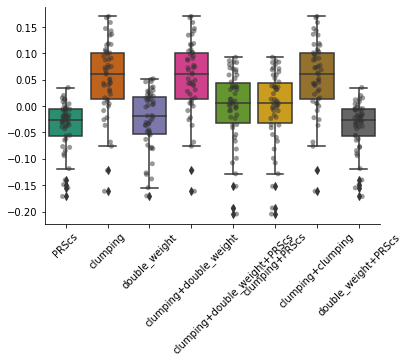

In [27]:
tprs.visualization.visualize_performance(processor, metric="r2_score",plot_type="box_plot")